# Final Project Submission : OSEMN with King County House Sales Dataset

Please fill out:
* Student name: Emily J. Cain
* Student pace: full time
* Scheduled project review date/time: Tuesday, October 30, 2018, 1400 EST
* Instructor name: Rafael Carrasco


## Obtain

Read in from csv file

In [2]:
# disable autoscroll

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [6]:
df = pd.read_csv('kc_house_data.csv')

In [7]:
# Check that csv loaded successfully 
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


## Scrub

* Change values to correct type as needed
* Replace or remove missing or placeholder values
* Change formatting as needed
* Check for typos and duplicates 

In [8]:
df.shape
# With less than 22,000 rows, I think I will be able to work with and manipulate the entire dataset

(21597, 21)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


One initial question that will need to be answered: why are there two columns for square foot living (sqft_living, sqft_living15) and square foot lot (sqft_lot, sqft_lot15)?

In [10]:
# check for null values
df.isna().sum()
# 2376 null values for waterfront, 63 for view, 3842 for yr_renovated

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [11]:
df.view.unique()
df.view.value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

According to the Kaggle website, this value represents how many times a home has been viewed. This value will most likely need to be changed to a categorical variable, but I want to do some exploratory analysis first. Since there are only 63 null values, and the majority of values are '0.0,' the null values can be changed to the mode of this dataset. If this value ends up being cast as a categorical variable, replacing the null values with '0.0' will also make the most sense. 

In [12]:
# change null values to the mode 0.0
df.view.fillna(0.0, inplace=True)
df.view.unique()

array([0., 3., 4., 2., 1.])

In [13]:
# change values to category
# df.view = df.view.astype('category')

About 10% of the waterfront values are null, and less than 1% of the properties have a value of '1.0,' which I assume to mean 'True' for waterfront. I am going to change the null values to '0.0' or 'False,' and then change the dtype to 'bool.' Because there are so few 'True' values in this column, it may not be worthwhile to keep it in the dataset. 

In [14]:
# df.waterfront.unique()
# df.waterfront.value_counts()
# df.waterfront.isna().sum()
df.waterfront.fillna(0.0, inplace=True)
df.waterfront.unique()

array([0., 1.])

In [15]:
# change values to bool
df.waterfront = df.waterfront.astype('bool')

In [16]:
# confirm dtype change
df.waterfront.value_counts()

False    21451
True       146
Name: waterfront, dtype: int64

Similar to the 'waterfront' variable, the 'yr_renovated' variable contains a vast majority (96.5%) of '0.0' or null variables. Even if the 'yr_renovated' variable does have a high correlation with 'price,' the information available to us is so small that it may not be reliable or representative of the data overall. I will change the null variables to '0.0,' but I may end up dropping this column. 

In [17]:
# df.yr_renovated.unique()
df.yr_renovated.value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
2000.0       29
2005.0       29
1990.0       22
2004.0       22
2009.0       21
1989.0       20
2006.0       20
2002.0       17
1991.0       16
1998.0       16
1984.0       16
1999.0       15
2008.0       15
2010.0       15
2001.0       15
1983.0       15
2015.0       14
1985.0       14
1986.0       14
1987.0       14
1994.0       14
1992.0       13
1993.0       12
1997.0       12
1995.0       12
          ...  
1975.0        5
1964.0        5
1969.0        4
1963.0        4
1973.0        4
1981.0        4
1965.0        4
1978.0        3
1960.0        3
1958.0        3
1956.0        3
1955.0        3
1945.0        3
1972.0        3
1967.0        2
1957.0        2
1940.0        2
1974.0        2
1962.0        2
1953.0        1
1950.0        1
1934.0        1
1944.0        1
1976.0        1
1948.0        1
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Leng

In [18]:
df.yr_renovated.fillna(0.0, inplace=True)

In [19]:
# confirm that there are no null values in dataset
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [20]:
# Check for placeholders - tried using a for loop, but output was difficult to read/interpret
# Come back later to implement a readable for loop output so that code will be DRY
# df.id.unique() 
# df.date.unique()
# df.price.unique()
# df.bedrooms.unique() ***
# df.bathrooms.unique()
# df.sqft_living.unique()
# df.sqft_lot.unique()
# df.floors.unique()
# df.condition.unique()
# df.grade.unique()
# df.sqft_above.unique()
# df.sqft_basement.unique() ***
# df.yr_built.unique()
# df.zipcode.unique()
# df.lat.unique()
# df.long.unique()
# df.sqft_living15.unique()
# df.sqft_lot15.unique()

In [21]:
# Possible error value found in df.bedrooms and placeholder found in df.sqft_basement
# df.bedrooms.value_counts() - 1 house with 33 bedrooms, the next highest bedroom count is 10
# df.bedrooms.median() - 3 bedrooms
# df.bathrooms.value_counts() - highest bathroom count 7.75

In [22]:
df.loc[df.bedrooms == 33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2402100895,6/25/2014,640000.0,33,1.75,1620,6000,1.0,False,0.0,...,7,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700


One house has a bedroom value of '33,' which I am going to replace with the median value of 3 because I think this number was entered by mistake. Even though it's certainly possible for a house to have 33 bedrooms, the next highest bedroom count is 10, so this seems like a big jump. The bathroom counts are also continuous with the highest being 7.75 bathrooms, and a house with 33 bedrooms would probably need more than 7.75 bathrooms. I checked the other values on this exact house to be sure, and with a 'sqft_living' value of 1620, I am certain this value is not correct.

In [23]:
df.bedrooms.replace(33, df.bedrooms.median(), inplace=True)

In [24]:
# confirm replacement
df.bedrooms.value_counts()

3     9825
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
Name: bedrooms, dtype: int64

In [25]:
df.sqft_basement.value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
800.0       201
400.0       184
1000.0      148
900.0       142
300.0       142
200.0       105
750.0       104
480.0       103
530.0       103
450.0       103
720.0        98
620.0        90
580.0        84
840.0        83
420.0        81
860.0        79
1100.0       78
670.0        78
780.0        76
550.0        76
650.0        75
240.0        74
380.0        73
680.0        73
850.0        72
          ...  
2610.0        1
768.0         1
2196.0        1
3260.0        1
475.0         1
1990.0        1
1816.0        1
2350.0        1
143.0         1
2580.0        1
1913.0        1
784.0         1
704.0         1
2730.0        1
1281.0        1
1275.0        1
946.0         1
1920.0        1
248.0         1
20.0          1
1284.0        1
1135.0        1
1245.0        1
2120.0        1
588.0         1
2050.0        1
2240.0        1
2250.0        1
2720.0        1
506.0         1
Name: sqft_basement, Len

In [26]:
# df.sqft_basement.unique()
# df.sqft_basement.value_counts()

# check to see if the sqft_basement values of '?' have a sqft_living value > sqft_above value
possible_basements = df.loc[(df['sqft_living'] > df['sqft_above']) & (df['sqft_basement'] == '?')]
possible_basements

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
112,2525310310,9/16/2014,272500.0,3,1.75,1540,12600,1.0,False,0.0,...,7,1160,?,1980,0.0,98038,47.3624,-122.031,1540,11656
115,3626039325,11/21/2014,740500.0,3,3.50,4380,6350,2.0,False,0.0,...,8,2780,?,1900,0.0,98117,47.6981,-122.368,1830,6350
309,3204800200,1/8/2015,665000.0,4,2.75,3320,10574,2.0,False,0.0,...,8,2220,?,1960,0.0,98056,47.5376,-122.180,2720,8330
384,713500030,7/28/2014,1350000.0,5,3.50,4800,14984,2.0,False,2.0,...,11,3480,?,1998,0.0,98006,47.5543,-122.148,4050,19009
508,5113400431,5/8/2014,615000.0,2,1.00,1540,6872,1.0,False,0.0,...,7,820,?,1946,0.0,98119,47.6454,-122.373,1420,5538
633,8832900550,9/12/2014,650000.0,3,2.50,2690,11575,1.0,False,3.0,...,8,2130,?,1957,0.0,98028,47.7605,-122.267,2390,11782
645,1545804340,4/9/2015,240000.0,3,1.75,1760,6500,1.0,False,0.0,...,7,1150,?,1987,0.0,98038,47.3647,-122.050,1760,8125
671,5101405124,9/12/2014,435000.0,4,2.50,1700,6380,1.0,False,0.0,...,7,850,?,1940,0.0,98115,47.6988,-122.319,1380,6380
755,5149300200,9/2/2014,316500.0,3,1.75,1600,14250,1.0,False,0.0,...,7,1070,?,1979,0.0,98023,47.3272,-122.355,2140,14960
1073,9209900270,2/5/2015,515000.0,2,1.00,1060,4228,1.0,False,0.0,...,7,860,?,1906,0.0,98112,47.6231,-122.293,1060,4187


In [27]:
# check to see how many rows have the same sqft_living and sqft_above values with '?' for sqft_basement value
probably_not_basements = df.loc[(df['sqft_living'] == df['sqft_above']) & (df['sqft_basement'] == '?')]
probably_not_basements

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,False,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
18,16000397,12/5/2014,189000.0,2,1.00,1200,9850,1.0,False,0.0,...,7,1200,?,1921,0.0,98002,47.3089,-122.210,1060,5095
42,7203220400,7/7/2014,861990.0,5,2.75,3595,5639,2.0,False,0.0,...,9,3595,?,2014,0.0,98053,47.6848,-122.016,3625,5639
79,1531000030,3/23/2015,720000.0,4,2.50,3450,39683,2.0,False,0.0,...,10,3450,?,2002,0.0,98010,47.3420,-122.025,3350,39750
217,1909600046,7/3/2014,445838.0,3,2.50,2250,5692,2.0,False,0.0,...,8,2250,?,2000,0.0,98146,47.5133,-122.379,1320,5390
664,1775920350,11/24/2014,323000.0,3,1.00,1290,12231,1.0,False,0.0,...,7,1290,?,1976,0.0,98072,47.7404,-122.110,1390,11632
685,2346200030,1/5/2015,802541.0,5,2.75,2990,6768,2.0,False,0.0,...,9,2990,?,2014,0.0,98006,47.5462,-122.182,2870,6768
881,7749500370,10/21/2014,225000.0,4,2.25,1800,9350,1.0,False,0.0,...,8,1800,?,1969,0.0,98092,47.2959,-122.191,2060,8800
890,1962200435,11/10/2014,1010000.0,4,1.00,1820,5400,1.5,False,0.0,...,8,1820,?,1923,2014.0,98102,47.6476,-122.318,1820,5400
995,8856004730,9/17/2014,199950.0,2,2.75,1590,20917,1.5,False,0.0,...,5,1590,?,1920,0.0,98001,47.2786,-122.250,1310,6000


The amount of rows in probably_not_basements (284) added to the amount of rows in possibly_basements (170) equals the amount of rows that have '?' as a value for sqft_basement. The rows where sqft_living equals sqft_above can be assumed to have a 0.0 value for sqft_basement. However, the total sqft_living value that is unexplained in the possibly_basement rows cannot be assumed to have a basement value. The extra square feet could be due to an attic, guest house, or other building that may not necessarily be a basement. I am going to drop these 170 rows since they make up only a small percentage (less than 1%) of the total dataset. 

In [28]:
# drop the possible_basements rows 
df.drop(possible_basements.index, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21427 entries, 0 to 21596
Data columns (total 21 columns):
id               21427 non-null int64
date             21427 non-null object
price            21427 non-null float64
bedrooms         21427 non-null int64
bathrooms        21427 non-null float64
sqft_living      21427 non-null int64
sqft_lot         21427 non-null int64
floors           21427 non-null float64
waterfront       21427 non-null bool
view             21427 non-null float64
condition        21427 non-null int64
grade            21427 non-null int64
sqft_above       21427 non-null int64
sqft_basement    21427 non-null object
yr_built         21427 non-null int64
yr_renovated     21427 non-null float64
zipcode          21427 non-null int64
lat              21427 non-null float64
long             21427 non-null float64
sqft_living15    21427 non-null int64
sqft_lot15       21427 non-null int64
dtypes: bool(1), float64(7), int64(11), object(2)
memory usage: 3.5+ MB


In [29]:
# replace probably_not_basement '?' values with 0.0
df.sqft_basement.replace('?', 0.0, inplace=True)

In [30]:
# confirm replacement
df.sqft_basement.value_counts()

0.0       12826
0.0         284
600.0       217
500.0       209
700.0       208
800.0       201
400.0       184
1000.0      148
300.0       142
900.0       142
200.0       105
750.0       104
450.0       103
530.0       103
480.0       103
720.0        98
620.0        90
580.0        84
840.0        83
420.0        81
860.0        79
1100.0       78
670.0        78
550.0        76
780.0        76
650.0        75
240.0        74
380.0        73
680.0        73
360.0        72
          ...  
172.0         1
2610.0        1
768.0         1
176.0         1
3260.0        1
861.0         1
1920.0        1
1816.0        1
2350.0        1
143.0         1
2580.0        1
1913.0        1
784.0         1
704.0         1
2730.0        1
1281.0        1
1275.0        1
248.0         1
1990.0        1
1135.0        1
20.0          1
1284.0        1
1245.0        1
2120.0        1
588.0         1
2240.0        1
2050.0        1
2720.0        1
2250.0        1
506.0         1
Name: sqft_basement, Len

In [31]:
# cast sqft_basement values to int64
df.sqft_basement = df.sqft_basement.astype('float')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21427 entries, 0 to 21596
Data columns (total 21 columns):
id               21427 non-null int64
date             21427 non-null object
price            21427 non-null float64
bedrooms         21427 non-null int64
bathrooms        21427 non-null float64
sqft_living      21427 non-null int64
sqft_lot         21427 non-null int64
floors           21427 non-null float64
waterfront       21427 non-null bool
view             21427 non-null float64
condition        21427 non-null int64
grade            21427 non-null int64
sqft_above       21427 non-null int64
sqft_basement    21427 non-null float64
yr_built         21427 non-null int64
yr_renovated     21427 non-null float64
zipcode          21427 non-null int64
lat              21427 non-null float64
long             21427 non-null float64
sqft_living15    21427 non-null int64
sqft_lot15       21427 non-null int64
dtypes: bool(1), float64(8), int64(11), object(1)
memory usage: 3.5+ MB


In [33]:
# change date to proper format
df.date = pd.to_datetime(df.date)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,False,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,False,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,False,0.0,...,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,False,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,False,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


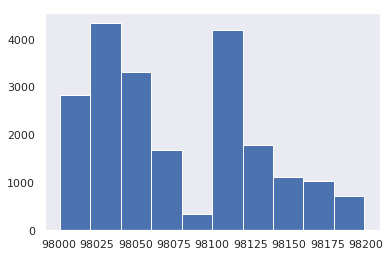

In [130]:
plt.hist(df.zipcode)
plt.show()

In [131]:
# will probably change zipcode to category
df.zipcode = df.zipcode.astype('category')

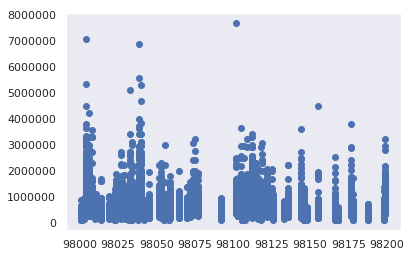

In [132]:
plt.scatter(df.zipcode, df.price)
plt.show()

#### Check for Multicollinearity

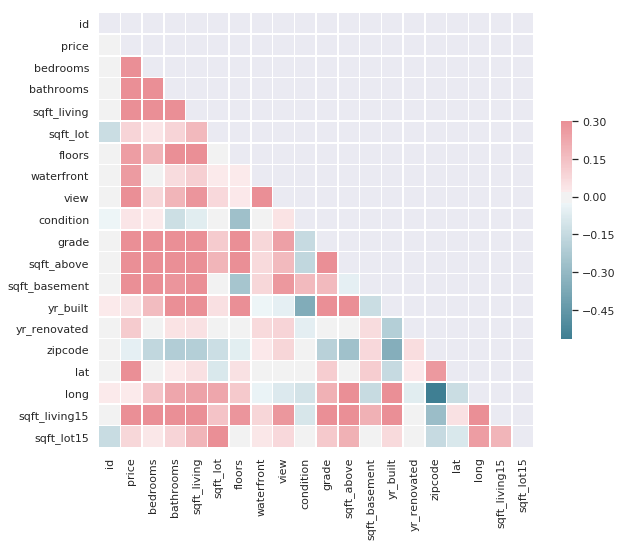

In [35]:
sns.set(style='dark')
corr = df.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(10,8))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=0.3, center=0, square=True, linewidth=0.5, cbar_kws={'shrink': 0.5});

The correlation heatmap shows that there is likely some multicollinearity between predictor values. I will probably do some exploring before deciding which columns to exclude. The heatmap is also useful in showing some initial correlation between the target variable and predictor variables. 

In [36]:
# z_score function to normalize data
def z_score(x, mean, std):
    return (x - mean) / std 

In [37]:
z_scores = []
price_array = np.array([df.price])
for x in price_array:
    z = z_score(x, price_array.mean(), price_array.std())
    rounded_z = np.round(z, decimals=2)
    z_scores.append(rounded_z)
z_scores

[array([-0.87, -0.01, -0.98, ..., -0.37, -0.38, -0.58])]

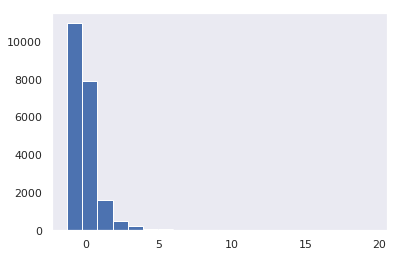

In [38]:
plt.hist(z_scores, bins=20);

In [39]:
sqft_living_z_scores = []
sq_living_array = np.array([df.sqft_living])
for x in sq_living_array:
    z = z_score(x, sq_living_array.mean(), sq_living_array.std())
    rounded_z = np.round(z, decimals=2)
    sqft_living_z_scores.append(rounded_z)
sqft_living_z_scores

[array([-0.98,  0.54, -1.43, ..., -1.15, -0.52, -1.15])]

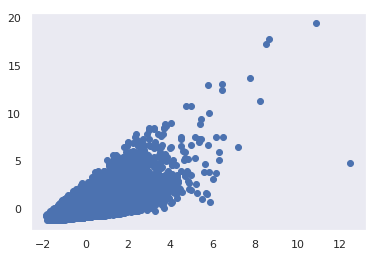

In [40]:
plt.scatter(sqft_living_z_scores, z_scores)

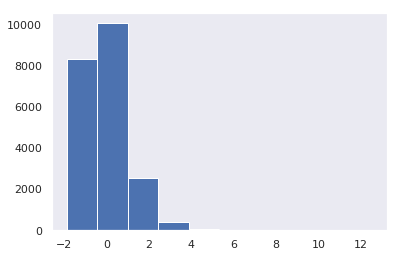

In [41]:
plt.hist(sqft_living_z_scores);

/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


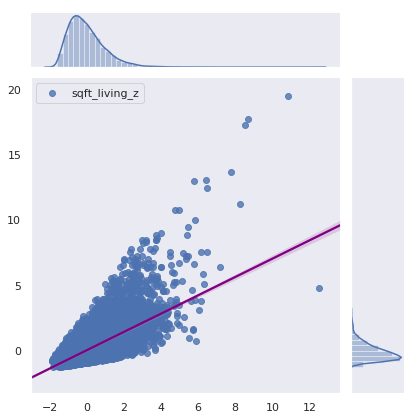

In [42]:
sns.jointplot(x=sqft_living_z_scores, y=z_scores, data=df, kind='reg', label='sqft_living_z', joint_kws={'line_kws':{'color':'purple'}})
plt.legend()
plt.show()

In [43]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.142700e+04,2.142700e+04,21427.000000,21427.000000,21427.000000,2.142700e+04,21427.000000,21427.000000,21427.000000,21427.000000,21427.000000,21427.000000,21427.000000,21427.000000,21427.000000,21427.000000,21427.000000,21427.000000,21427.000000
mean,4.581745e+09,5.398495e+05,3.369814,2.114505,2078.575349,1.510892e+04,1.495426,0.231577,3.408177,7.657488,1790.591917,287.983432,1971.064078,68.371447,98077.850469,47.559938,-122.213670,1986.831521,12743.618239
std,2.876703e+09,3.674187e+05,0.902500,0.768915,917.738233,4.149498e+04,0.539880,0.762736,0.649555,1.174325,828.629548,440.821343,29.349442,363.046597,53.502469,0.138688,0.140812,685.981140,27154.900920
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.210000e+05,3.000000,1.750000,1420.000000,5.043000e+03,1.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1952.000000,0.000000,98033.000000,47.470500,-122.328000,1490.000000,5100.000000
50%,3.904940e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.500000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571700,-122.229000,1840.000000,7620.000000
75%,7.312050e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.067200e+04,2.000000,0.000000,4.000000,8.000000,2220.000000,550.000000,1997.000000,0.000000,98117.000000,47.678000,-122.125000,2360.000000,10080.000000
max,9.900000e+09,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## INVESTIGATION INTO MANSIONS AND WHETHER THEY ARE MESSING UP MY DATA

In [44]:
df.sqft_living.describe()
# max value is suspicious and clearly an outlier - let us examine this particular mansion and see if there are any others!

count    21427.000000
mean      2078.575349
std        917.738233
min        370.000000
25%       1420.000000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64

In [45]:
# most offensive mansion
df.loc[df.sqft_living == 13540]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
12764,1225069038,2014-05-05,2280000.0,7,8.0,13540,307752,3.0,False,4.0,...,12,9410,4130.0,1999,0.0,98053,47.6675,-121.986,4850,217800


In [46]:
# find more offensive mansions (fun fact: realtors classify mansions as any home with a sqft of over 8,000!)
df.loc[df.sqft_living > 10000]
# 3 homes with a sqft of over 10,000

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3910,9808700762,2014-06-11,7060000.0,5,4.5,10040,37325,2.0,True,2.0,...,11,7680,2360.0,1940,2001.0,98004,47.6500,-122.214,3930,25449
7245,6762700020,2014-10-13,7700000.0,6,8.0,12050,27600,2.5,False,3.0,...,13,8570,3480.0,1910,1987.0,98102,47.6298,-122.323,3940,8800
12764,1225069038,2014-05-05,2280000.0,7,8.0,13540,307752,3.0,False,4.0,...,12,9410,4130.0,1999,0.0,98053,47.6675,-121.986,4850,217800


In [47]:
df.loc[df.sqft_living > 9000]
# 6 homes with a sqft_living of over 9,000

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3910,9808700762,2014-06-11,7060000.0,5,4.50,10040,37325,2.0,True,2.0,...,11,7680,2360.0,1940,2001.0,98004,47.6500,-122.214,3930,25449
4407,2470100110,2014-08-04,5570000.0,5,5.75,9200,35069,2.0,False,0.0,...,13,6200,3000.0,2001,0.0,98039,47.6289,-122.233,3560,24345
7245,6762700020,2014-10-13,7700000.0,6,8.00,12050,27600,2.5,False,3.0,...,13,8570,3480.0,1910,1987.0,98102,47.6298,-122.323,3940,8800
8085,1924059029,2014-06-17,4670000.0,5,6.75,9640,13068,1.0,True,4.0,...,12,4820,4820.0,1983,2009.0,98040,47.5570,-122.210,3270,10454
9245,9208900037,2014-09-19,6890000.0,6,7.75,9890,31374,2.0,False,4.0,...,13,8860,1030.0,2001,0.0,98039,47.6305,-122.240,4540,42730
12764,1225069038,2014-05-05,2280000.0,7,8.00,13540,307752,3.0,False,4.0,...,12,9410,4130.0,1999,0.0,98053,47.6675,-121.986,4850,217800


In [48]:
# 'official' mansions, according to the realtors
df.loc[df.sqft_living >= 8000]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1162,1247600105,2014-10-20,5110000.0,5,5.25,8010,45517,2.0,True,4.0,...,12,5990,2020.0,1999,0.0,98033,47.6767,-122.211,3430,26788
1446,8907500070,2015-04-13,5350000.0,5,5.00,8000,23985,2.0,False,4.0,...,12,6720,1280.0,2009,0.0,98004,47.6232,-122.220,4600,21750
3910,9808700762,2014-06-11,7060000.0,5,4.50,10040,37325,2.0,True,2.0,...,11,7680,2360.0,1940,2001.0,98004,47.6500,-122.214,3930,25449
4407,2470100110,2014-08-04,5570000.0,5,5.75,9200,35069,2.0,False,0.0,...,13,6200,3000.0,2001,0.0,98039,47.6289,-122.233,3560,24345
7245,6762700020,2014-10-13,7700000.0,6,8.00,12050,27600,2.5,False,3.0,...,13,8570,3480.0,1910,1987.0,98102,47.6298,-122.323,3940,8800
8085,1924059029,2014-06-17,4670000.0,5,6.75,9640,13068,1.0,True,4.0,...,12,4820,4820.0,1983,2009.0,98040,47.5570,-122.210,3270,10454
9245,9208900037,2014-09-19,6890000.0,6,7.75,9890,31374,2.0,False,4.0,...,13,8860,1030.0,2001,0.0,98039,47.6305,-122.240,4540,42730
12764,1225069038,2014-05-05,2280000.0,7,8.00,13540,307752,3.0,False,4.0,...,12,9410,4130.0,1999,0.0,98053,47.6675,-121.986,4850,217800
14542,2303900035,2014-06-11,2890000.0,5,6.25,8670,64033,2.0,False,4.0,...,13,6120,2550.0,1965,0.0,98177,47.7295,-122.372,4140,81021
18288,6072800246,2014-07-02,3300000.0,5,6.25,8020,21738,2.0,False,0.0,...,11,8020,0.0,2001,0.0,98006,47.5675,-122.189,4160,18969


### Investigating the sqft_living15 and sqft_lot15 variables
The Kaggle website describes the sqft_living15 and sqft_lot15 variables as being the sqft values taken in 2015. If these new values included the 2014 values and were a measurement of the new _total_ sqft values, then the 2015 values should consistently be greater than the original values. However, as shown below, there are over 8000 rows with sqft_living15 and sqft_lot15 values that are _smaller_ than the original values. Could these 2015 values then be a measurement of only the added values (i.e. only the value of the added renovation space or acquired property)? Again, this assumption is also wrong because there are more than 8000 rows where the 2015 values are _larger_ than the original values. Although it is possible that some homes more than doubled their living space or property size, it seems unlikely that so many would have done so in just one year. The meaning of the 2015 variables is therefore unknown and may be an unreliable predictor.  

In [49]:
df.loc[df.sqft_living15 < df.sqft_living].shape

(9731, 21)

In [50]:
df.loc[df.sqft_living15 > df.sqft_living].shape

(9151, 21)

In [51]:
df.loc[df.sqft_lot > df.sqft_lot15].shape

(8528, 21)

In [52]:
df.loc[df.sqft_lot < df.sqft_lot15].shape

(8468, 21)

## Trimming mansions from the dataset
### Process
* Start with a new dataframe excluding the official realtor's definition of a mansion: any home with over 8,000 sqft
* Examine the summary statistics of the new dataframe using .describe() for clues to investigate major outliers
* None of the qualities used as criteria for dropping from the dataset could represent more than 1% of the new non_mansion dataframe. I chose to use the original size (21417) of the new non_mansion dataframe to compare every variable, although I realize the dataframe does get smaller as I trim outliers from each variable (changing the value of 1%). However, I assumed that many of the outliers shared the same properties (i.e. a house with a large number of bedrooms also has a large number of bathrooms and a greater sqft_living value), so I will also assume that as I work through the dataset dropping mansions, there will be overlap among the outliers (i.e. if the mansions according to bedrooms were already dropped, then the number of bathroom outliers will be smaller before I touch them, making up for the decrease in the overall dataframe).  

### Criteria
* Homes with more than 6 bedrooms
* Homes with a sqft_living > 5000
* Homes with more than 3 floors 
* Homes with more than 4 bathrooms
* Homes with a sqft_living15 value greater than or equal to 4000
* Properties with a sqft_lot15 value greater than 150,000
* Properties with a sqft_lot value greater than 300,000

In [53]:
# make a new df excluding official mansions
non_mansion_df = df.loc[df['sqft_living'] < 8000].copy()

In [54]:
non_mansion_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.141700e+04,2.141700e+04,21417.000000,21417.000000,21417.000000,2.141700e+04,21417.000000,21417.000000,21417.00000,21417.000000,21417.000000,21417.000000,21417.000000,21417.000000,21417.000000,21417.000000,21417.000000,21417.000000,21417.000000
mean,4.581553e+09,5.377286e+05,3.368866,2.112527,2075.013961,1.508761e+04,1.495167,0.230331,3.40832,7.655367,1788.047953,286.966008,1971.059532,68.123360,98077.863613,47.559903,-122.213668,1985.871924,12727.244806
std,2.876453e+09,3.521427e+05,0.901529,0.763186,902.243662,4.145378e+04,0.539777,0.759966,0.64964,1.170377,819.847106,437.367861,29.347893,362.409495,53.500312,0.138707,0.140830,684.617971,27119.735056
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.00000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.210000e+05,3.000000,1.500000,1420.000000,5.042000e+03,1.000000,0.000000,3.00000,7.000000,1200.000000,0.000000,1952.000000,0.000000,98033.000000,47.470400,-122.328000,1490.000000,5100.000000
50%,3.904940e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.500000,0.000000,3.00000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571700,-122.229000,1840.000000,7620.000000
75%,7.312000e+09,6.434030e+05,4.000000,2.500000,2550.000000,1.065900e+04,2.000000,0.000000,4.00000,8.000000,2216.000000,550.000000,1997.000000,0.000000,98117.000000,47.678000,-122.124000,2360.000000,10080.000000
max,9.900000e+09,5.300000e+06,11.000000,7.500000,7880.000000,1.651359e+06,3.500000,4.000000,5.00000,13.000000,7880.000000,3500.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [55]:
non_mansion_df.loc[non_mansion_df['bedrooms'] > 6].shape

(58, 21)

In [56]:
non_mansion_df.drop(non_mansion_df.loc[non_mansion_df.bedrooms > 6].index, inplace=True)

In [57]:
non_mansion_df.loc[non_mansion_df.sqft_living > 5000].shape

(191, 21)

In [58]:
non_mansion_df.drop(non_mansion_df.loc[non_mansion_df.sqft_living > 5000].index, inplace=True)

In [59]:
non_mansion_df.floors.describe()

count    21168.000000
mean         1.490339
std          0.539014
min          1.000000
25%          1.000000
50%          1.500000
75%          2.000000
max          3.500000
Name: floors, dtype: float64

In [60]:
non_mansion_df.loc[non_mansion_df.floors > 3].shape

(6, 21)

In [61]:
non_mansion_df.drop(non_mansion_df.loc[non_mansion_df.floors > 3].index, inplace=True)

In [62]:
non_mansion_df.drop(non_mansion_df.loc[non_mansion_df.bathrooms > 4].index, inplace=True)

In [63]:
non_mansion_df.loc[non_mansion_df.sqft_living15 >= 4000].shape

(158, 21)

In [64]:
non_mansion_df.drop(non_mansion_df[non_mansion_df.sqft_living15 >= 4000].index, inplace=True)

In [65]:
non_mansion_df.loc[non_mansion_df.sqft_lot15 > 150000].shape

(208, 21)

In [66]:
non_mansion_df.loc[non_mansion_df.sqft_lot > 300000].shape

(64, 21)

In [67]:
non_mansion_df.drop(non_mansion_df[non_mansion_df.sqft_lot > 300000].index, inplace=True)

In [68]:
non_mansion_df.bedrooms.values

array([3, 3, 2, ..., 2, 3, 2])

In [69]:
non_mansion_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.079500e+04,2.079500e+04,20795.000000,20795.000000,20795.000000,20795.000000,20795.000000,20795.000000,20795.000000,20795.000000,20795.000000,20795.000000,20795.000000,20795.000000,20795.000000,20795.000000,20795.000000,20795.000000,20795.000000
mean,4.599603e+09,5.126015e+05,3.332051,2.063874,2005.754316,13045.364078,1.483025,0.206829,3.412407,7.587593,1731.286800,274.467516,1970.604568,66.892474,98078.522674,47.559483,-122.215807,1944.777639,11845.658764
std,2.876599e+09,2.943575e+05,0.858515,0.700207,790.226103,25702.037865,0.537500,0.718255,0.651321,1.086284,735.215626,416.873345,29.289505,359.220997,53.576188,0.139277,0.140095,622.267493,22951.367343
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,520.000000,1.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.515000,399.000000,651.000000
25%,2.128000e+09,3.190000e+05,3.000000,1.500000,1410.000000,5000.000000,1.000000,0.000000,3.000000,7.000000,1180.000000,0.000000,1951.000000,0.000000,98033.000000,47.468300,-122.330000,1480.000000,5067.500000
50%,3.905082e+09,4.450000e+05,3.000000,2.250000,1880.000000,7526.000000,1.000000,0.000000,3.000000,7.000000,1540.000000,0.000000,1974.000000,0.000000,98065.000000,47.571100,-122.234000,1820.000000,7560.000000
75%,7.335400e+09,6.250000e+05,4.000000,2.500000,2486.500000,10360.500000,2.000000,0.000000,4.000000,8.000000,2150.000000,530.000000,1996.000000,0.000000,98118.000000,47.678750,-122.128000,2320.000000,9912.000000
max,9.900000e+09,3.640000e+06,6.000000,4.000000,5000.000000,295772.000000,3.000000,4.000000,5.000000,12.000000,4860.000000,2350.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,3990.000000,434728.000000


### Playing around with statsmodel

In [70]:
f = 'price~bathrooms + sqft_living + grade + lat'
model = ols(formula=f, data=non_mansion_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.573
Model:                            OLS   Adj. R-squared:                  0.573
Method:                 Least Squares   F-statistic:                     6966.
Date:                Thu, 25 Oct 2018   Prob (F-statistic):               0.00
Time:                        08:53:42   Log-Likelihood:            -2.8253e+05
No. Observations:               20795   AIC:                         5.651e+05
Df Residuals:                   20790   BIC:                         5.651e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -3.114e+07   4.59e+05    -67.852      0.000    -3.2e+07   -3.02e+07
bathrooms   -2.848e+04   2822.702    -10.088      0.000    -3.4e+04   -2.29e+04
sqft_living   161.7514      2.831     57.134      0.000     156.202     167.301
grade        9.052e+04   1861.115     48.636      0.000    8.69e+04    9.42e+04
lat          6.454e+05   9674.168     66.716      0.000    6.26e+05    6.64e+05
==============================================================================
Omnibus:                    12990.947   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           251811.253
Skew:                           2.675   Prob(JB):                         0.00
Kurtosis:                      19.187   Cond. No.                     7.42e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.42e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [71]:
model.pvalues

Intercept      0.000000e+00
bathrooms      7.050006e-24
sqft_living    0.000000e+00
grade          0.000000e+00
lat            0.000000e+00
dtype: float64

In [96]:
# fit a model to try and get large p-values
# f = 'price~yr_built + long'
# model = ols(formula=f, data=non_mansion_df).fit()
# model.summary()

In [73]:
# The 'long' variable has a large p-value and the model has a terrible R-squared value (which is what I was 
# hoping for). But the yr_built gives another 0 p-value, so I am suspicious of the accuracy of my previous p-vales

In [97]:
feature_cols = ['sqft_living', 'lat', 'bathrooms', 'grade']
X = non_mansion_df[feature_cols]
y = non_mansion_df['price']

In [98]:
# from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [100]:
# from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [101]:
print(linreg.intercept_, linreg.coef_)

-30856913.848603413 [ 1.64141818e+02  6.39547389e+05 -2.84808012e+04  8.97994602e+04]


In [105]:
yhat_train = linreg.predict(X_train)
yhat_test = linreg.predict(X_test)

train_residuals = yhat_train - y_train
test_residuals = yhat_test - y_test

In [106]:
# from sklearn import metrics
train_mse = metrics.mean_squared_error(y_train, yhat_train)
test_mse = metrics.mean_squared_error(y_test, yhat_test)

print(train_mse, test_mse)

36744138801.331375 37878501860.72327


In [ ]:
# train_mse and test_mse are huge, need to standardize data

In [83]:
# normalize by using the mean
# non_mansion_df.sqft_living = non_mansion_df.sqft_living/non_mansion_df.sqft_living.mean()

In [86]:
# regression plots for grade
# fig = plt.figure(figsize=(12,8))
# fig = sm.graphics.plot_regress_exog(model, "grade", fig=fig)

### Standardize values with z-scores

In [ ]:
# def z_score(x, mean, std):
    # return (x - mean) / std 

In [ ]:
z_scores = []
price_array = np.array([df.price])
for x in price_array:
    z = z_score(x, price_array.mean(), price_array.std())
    rounded_z = np.round(z, decimals=2)
    z_scores.append(rounded_z)
z_scores

In [107]:
# function for converting an entire column's values into z-scores
def z_scored_column(column):
    z_scores = []
    col_array = np.array([column])
    for x in col_array:
        z = z_score(x, col_array.mean(), col_array.std())
        rounded_z = np.round(z, decimals=5)
        z_scores.append(rounded_z)
    return z_scores

In [110]:
# z_prices = z_scored_column(non_mansion_df.price)
# z_lats = z_scored_column(non_mansion_df.lat)
# z_bathrooms = z_scored_column(non_mansion_df.bathrooms)
# z_sqft_living = z_scored_column(non_mansion_df.sqft_living)
# z_grades = z_scored_column(non_mansion_df.grade)

In [112]:
# X = z_lats, z_bathrooms, z_sqft_living, z_grades
# y = z_prices

In [133]:
# X_train, X_test, y_train, y_test = train_test_split(X,y)

# linreg = LinearRegression()
# linreg.fit(X_train, y_train)

# yhat_train = linreg.predict(X_train)
# yhat_test = linreg.predict(X_test)

# train_residuals = yhat_train - y_train
# test_residuals = yhat_test - y_test

# train_mse = metrics.mean_squared_error(y_train, yhat_train)
# test_mse = metrics.mean_squared_error(y_test, yhat_test)

# print(train_mse, test_mse)

In [114]:
from scipy.stats import zscore

In [115]:
# make a new dataframe containing z_scores
num_cols = non_mansion_df.select_dtypes(include=[np.number]).columns
z_df = non_mansion_df[num_cols].apply(zscore)

In [116]:
z_df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0.879427,-0.987603,-0.386783,-1.519406,-1.044985,-0.287741,-0.898673,-0.287967,-0.633201,-0.540933,-0.749848,-0.658411,-0.532783,-0.186220,1.856790,-0.346674,-0.294041,-0.971917,-0.269954
1,0.630794,0.086287,-0.386783,0.265823,0.714048,-0.225799,0.961838,-0.287967,-0.633201,-0.540933,0.596728,0.301136,-0.669354,5.356462,0.867521,1.159708,-0.736608,-0.409444,-0.183290
2,0.358730,-1.129951,-1.551612,-1.519406,-1.563836,-0.118490,-0.898673,-0.287967,-0.633201,-1.461525,-1.307521,-0.658411,-1.283923,-0.186220,-0.943029,1.281052,-0.122725,1.245832,-0.164859
3,-0.734358,0.310509,0.778047,1.336960,-0.057902,-0.313032,-0.898673,-0.287967,2.437558,-0.540933,-0.926671,1.524558,-0.191355,-0.186220,1.072841,-0.277745,-1.264833,-0.939775,-0.298275
4,-0.919581,-0.008838,-0.386783,-0.091223,-0.412239,-0.193194,-0.898673,-0.287967,-0.633201,0.379658,-0.069759,-0.658411,0.559785,-0.186220,-0.084418,0.411543,1.219252,-0.232667,-0.189216


In [117]:
feature_cols = ['bathrooms', 'sqft_living', 'grade', 'lat']
X = z_df[feature_cols]
y = z_df['price']

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

linreg = LinearRegression()
linreg.fit(X_train, y_train)

yhat_train = linreg.predict(X_train)
yhat_test = linreg.predict(X_test)

train_residuals = yhat_train - y_train
test_residuals = yhat_test - y_test

train_mse = metrics.mean_squared_error(y_train, yhat_train)
test_mse = metrics.mean_squared_error(y_test, yhat_test)

print(train_mse, test_mse)

0.4212188760802104 0.4459954026320436


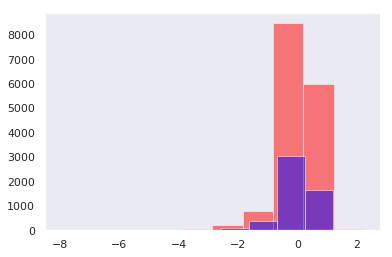

In [125]:
plt.hist(train_residuals, color="red", label="training residuals", alpha=0.5)
plt.hist(test_residuals, color="blue", label="test residuals", alpha=0.5)
plt.legend
plt.show()
# Are these supposed to be the normally-distributed variables??

In [119]:
from sklearn.metrics import r2_score

In [120]:
r2_train = r2_score(y_train, yhat_train)
r2_test = r2_score(y_test, yhat_test)
print(r2_train, r2_test)

0.5697247284326918 0.5804401807380069


In [121]:
# using z_df with statsmodel 
f = 'price~bathrooms + sqft_living + grade + lat'
model = ols(formula=f, data=z_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.573
Model:                            OLS   Adj. R-squared:                  0.573
Method:                 Least Squares   F-statistic:                     6966.
Date:                Thu, 25 Oct 2018   Prob (F-statistic):               0.00
Time:                        10:02:08   Log-Likelihood:                -20667.
No. Observations:               20795   AIC:                         4.134e+04
Df Residuals:                   20790   BIC:                         4.138e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.266e-14      0.005   2.79e-12      1.000      -0.009       0.009
bathrooms      -0.0677      0.007    -10.088      0.000      -0.081      -0.055
sqft_living     0.4342      0.008     57.134      0.000       0.419       0.449
grade           0.3340      0.007     48.636      0.000       0.321       0.348
lat             0.3054      0.005     66.716      0.000       0.296       0.314
==============================================================================
Omnibus:                    12990.947   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           251811.253
Skew:                           2.675   Prob(JB):                         0.00
Kurtosis:                      19.187   Cond. No.                         3.14
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [122]:
model.pvalues

Intercept      1.000000e+00
bathrooms      7.050006e-24
sqft_living    0.000000e+00
grade          0.000000e+00
lat            0.000000e+00
dtype: float64

In [123]:
# Play with some other z_scores now that you have z_scores yay!!!
f = 'price~bedrooms + sqft_lot + floors + condition + sqft_above + sqft_living15'
model = ols(formula=f, data=z_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     2099.
Date:                Thu, 25 Oct 2018   Prob (F-statistic):               0.00
Time:                        10:04:42   Log-Likelihood:                -24582.
No. Observations:               20795   AIC:                         4.918e+04
Df Residuals:                   20788   BIC:                         4.923e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -2.429e-17      0.005  -4.44e-15      1.000      -0.011       0.011
bedrooms         -0.0038      0.006     -0.595      0.552      -0.016       0.009
sqft_lot         -0.0481      0.006     -8.462      0.000      -0.059      -0.037
floors            0.0367      0.007      5.347      0.000       0.023       0.050
condition         0.1465      0.006     25.671      0.000       0.135       0.158
sqft_above        0.2878      0.010     29.616      0.000       0.269       0.307
sqft_living15     0.3715      0.008     46.469      0.000       0.356       0.387
==============================================================================
Omnibus:                    10478.040   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           121464.860
Skew:                           2.152   Prob(JB):                         0.00
Kurtosis:                      14.030   Cond. No.                         3.41
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# observations from above model = interesting that bedrooms p-value is so much larger than the one for bathrooms
# not going to include bedrooms in future models 

In [124]:
print(model.pvalues)
# I like these non-zero pvalues much better! They seem less suspicious. 

Intercept         1.000000e+00
bedrooms          5.520261e-01
sqft_lot          2.790146e-17
floors            9.029584e-08
condition        4.180469e-143
sqft_above       7.722935e-189
sqft_living15     0.000000e+00
dtype: float64


In [134]:
f = 'price~bathrooms + lat + sqft_above + grade + view'
model = ols(formula=f, data=z_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.585
Model:                            OLS   Adj. R-squared:                  0.584
Method:                 Least Squares   F-statistic:                     5850.
Date:                Thu, 25 Oct 2018   Prob (F-statistic):               0.00
Time:                        11:40:41   Log-Likelihood:                -20374.
No. Observations:               20795   AIC:                         4.076e+04
Df Residuals:                   20789   BIC:                         4.081e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.328e-14      0.004   2.97e-12      1.000      -0.009       0.009
bathrooms      0.0492      0.006      7.988      0.000       0.037       0.061
lat            0.3218      0.005     70.742      0.000       0.313       0.331
sqft_above     0.2217      0.007     31.888      0.000       0.208       0.235
grade          0.3646      0.007     51.881      0.000       0.351       0.378
view           0.2565      0.005     56.114      0.000       0.248       0.265
==============================================================================
Omnibus:                    11602.627   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           174010.919
Skew:                           2.369   Prob(JB):                         0.00
Kurtosis:                      16.356   Cond. No.                         3.03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [135]:
model.pvalues

Intercept      1.000000e+00
bathrooms      1.445085e-15
lat            0.000000e+00
sqft_above    6.858546e-218
grade          0.000000e+00
view           0.000000e+00
dtype: float64

In [136]:
feature_cols = ['bathrooms', 'sqft_above', 'grade', 'lat', 'view']
X = z_df[feature_cols]
y = z_df['price']

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

linreg = LinearRegression()
linreg.fit(X_train, y_train)

yhat_train = linreg.predict(X_train)
yhat_test = linreg.predict(X_test)

train_residuals = yhat_train - y_train
test_residuals = yhat_test - y_test

train_mse = metrics.mean_squared_error(y_train, yhat_train)
test_mse = metrics.mean_squared_error(y_test, yhat_test)

print(train_mse, test_mse)

0.4227312654141731 0.3940330102998458


In [138]:
r2_train = r2_score(y_train, yhat_train)
r2_test = r2_score(y_test, yhat_test)
print(r2_train, r2_test)

0.5815793729411176 0.5933167284802416


In [139]:
from sklearn.model_selection import cross_val_score

In [141]:
cv_10_results = cross_val_score(linreg, X, y, cv=10, scoring="neg_mean_squared_error")
cv_10_results

array([-0.40002065, -0.39921351, -0.37902086, -0.44474103, -0.34560994,
       -0.43750028, -0.47540399, -0.43266072, -0.45042968, -0.40188907])

In [146]:
f = 'price~bathrooms + lat + sqft_above + grade + sqft_living'
model = ols(formula=f, data=z_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.575
Model:                            OLS   Adj. R-squared:                  0.575
Method:                 Least Squares   F-statistic:                     5630.
Date:                Thu, 25 Oct 2018   Prob (F-statistic):               0.00
Time:                        12:42:29   Log-Likelihood:                -20605.
No. Observations:               20795   AIC:                         4.122e+04
Df Residuals:                   20789   BIC:                         4.127e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.238e-14      0.005   2.74e-12      1.000      -0.009       0.009
bathrooms      -0.0674      0.007    -10.064      0.000      -0.081      -0.054
lat             0.2981      0.005     64.646      0.000       0.289       0.307
sqft_above     -0.1016      0.009    -11.147      0.000      -0.119      -0.084
grade           0.3569      0.007     49.928      0.000       0.343       0.371
sqft_living     0.5043      0.010     51.227      0.000       0.485       0.524
==============================================================================
Omnibus:                    12997.677   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           255390.567
Skew:                           2.672   Prob(JB):                         0.00
Kurtosis:                      19.316   Cond. No.                         4.84
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [147]:
# check for correlation between sqft_living and sqft_above
f = 'sqft_living~sqft_above'
model = ols(formula=f, data=z_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            sqft_living   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                 5.556e+04
Date:                Thu, 25 Oct 2018   Prob (F-statistic):               0.00
Time:                        12:44:42   Log-Likelihood:                -15982.
No. Observations:               20795   AIC:                         3.197e+04
Df Residuals:                   20793   BIC:                         3.198e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.318e-16      0.004  -3.64e-14      1.000      -0.007       0.007
sqft_above     0.8530      0.004    235.720      0.000       0.846       0.860
==============================================================================
Omnibus:                     4888.279   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9422.100
Skew:                           1.460   Prob(JB):                         0.00
Kurtosis:                       4.531   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [148]:
f = 'price~bathrooms + lat + sqft_above + grade + sqft_living'
model = ols(formula=f, data=z_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.575
Model:                            OLS   Adj. R-squared:                  0.575
Method:                 Least Squares   F-statistic:                     5630.
Date:                Thu, 25 Oct 2018   Prob (F-statistic):               0.00
Time:                        12:45:41   Log-Likelihood:                -20605.
No. Observations:               20795   AIC:                         4.122e+04
Df Residuals:                   20789   BIC:                         4.127e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.238e-14      0.005   2.74e-12      1.000      -0.009       0.009
bathrooms      -0.0674      0.007    -10.064      0.000      -0.081      -0.054
lat             0.2981      0.005     64.646      0.000       0.289       0.307
sqft_above     -0.1016      0.009    -11.147      0.000      -0.119      -0.084
grade           0.3569      0.007     49.928      0.000       0.343       0.371
sqft_living     0.5043      0.010     51.227      0.000       0.485       0.524
==============================================================================
Omnibus:                    12997.677   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           255390.567
Skew:                           2.672   Prob(JB):                         0.00
Kurtosis:                      19.316   Cond. No.                         4.84
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [150]:
feature_cols = ['bathrooms', 'sqft_above', 'grade', 'lat', 'sqft_living']
X = z_df[feature_cols]
y = z_df['price']

In [151]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

linreg = LinearRegression()
linreg.fit(X_train, y_train)

yhat_train = linreg.predict(X_train)
yhat_test = linreg.predict(X_test)

train_residuals = yhat_train - y_train
test_residuals = yhat_test - y_test

train_mse = metrics.mean_squared_error(y_train, yhat_train)
test_mse = metrics.mean_squared_error(y_test, yhat_test)

print(train_mse, test_mse)

0.4282702257080601 0.41463024103204


In [152]:
cv_10_results = cross_val_score(linreg, X, y, cv=10, scoring="neg_mean_squared_error")
cv_10_results

array([-0.42255103, -0.40536952, -0.41650275, -0.46310978, -0.35897497,
       -0.41963692, -0.46308087, -0.47808982, -0.45668606, -0.37207449])

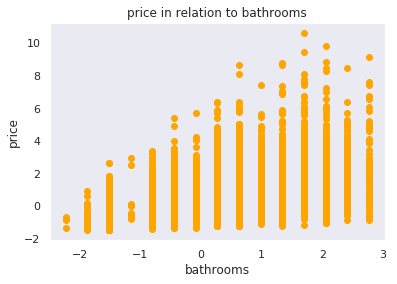

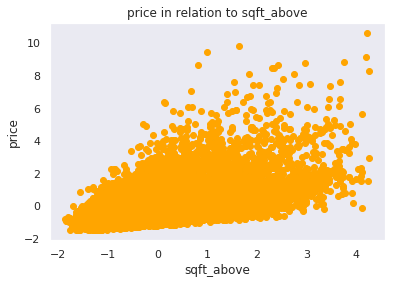

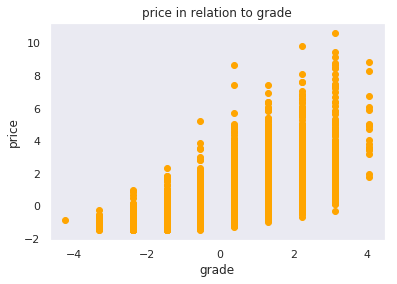

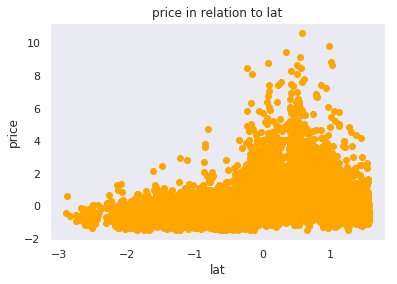

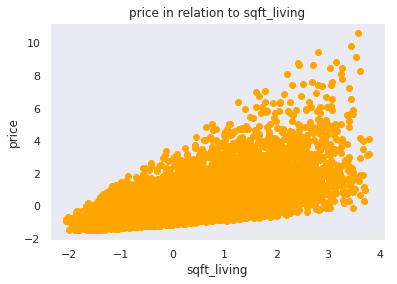

In [158]:
for x in feature_cols:
    plt.scatter(z_df[x], y, color='orange')
    plt.title(f'price in relation to {x}')
    plt.xlabel(f'{x}')
    plt.ylabel('price')
    plt.legend
    plt.show()

In [162]:
# sns.lmplot(x="sqft_living", y="price", data=z_df);

## Explore

* Understand the data through visualization, inspection, and descriptive statistics
* Explore relationships with visualization
* Understand why certain values were collected and included in dataset
* Genderate questions that can be answered from the data

In [87]:
# non_mansion_df = df.loc[df['sqft_living'] < 6000]

In [88]:
# non_mansion_df.describe()

In [89]:
# f = 'price~sqft_living'
# model = ols(formula=f, data=non_mansion_df).fit()

In [90]:
# model.summary()

In [91]:
# model.pvalues[2]

In [92]:
# df.info()

In [93]:
# explore distributions of column values
# columns = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_basement', 'condition', 'grade', 'sqft_above', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
# for col in columns:
    # df.hist(column=col);

In [94]:
# Normalized ugly histograms with kde plots with original values
# columns = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_basement', 'sqft_lot', 'floors', 'condition', 'grade', 'sqft_above', 'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
# for col in columns:
    # df[col].plot.hist(density=True)
    # df[col].plot.kde(label=col)
    # plt.legend()
    # plt.show()

In [126]:
# Build joint plots to examine relationship between predictors and target variable
# columns = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'condition', 'sqft_basement', 'grade', 'sqft_above', 'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
# for col in columns:
    # sns.jointplot(x=col, y='price', data=non_mansion_df, kind='reg', label=col, joint_kws={'line_kws':{'color':'purple'}})
    # plt.legend()
    # plt.show()

/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


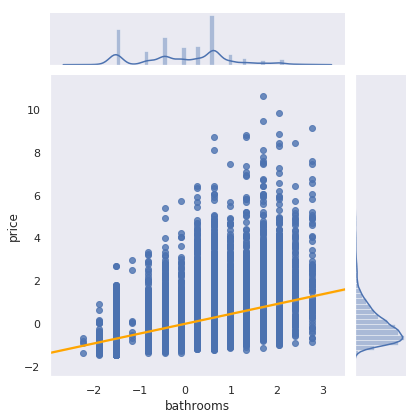

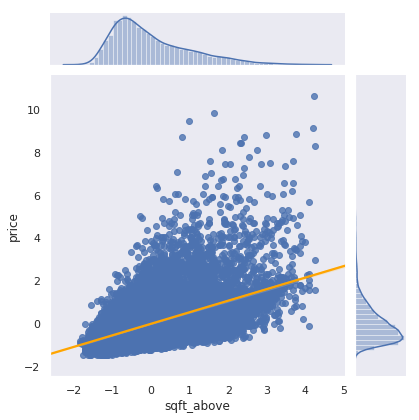

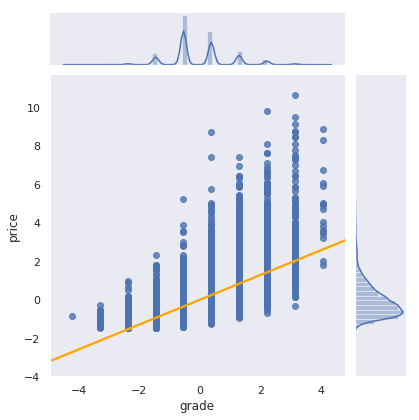

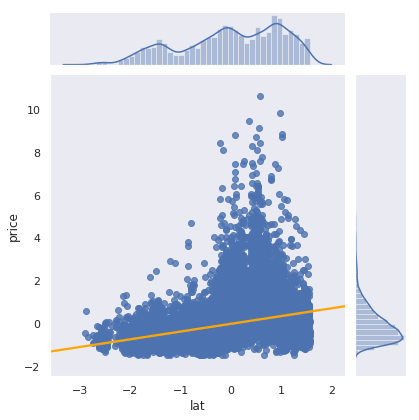

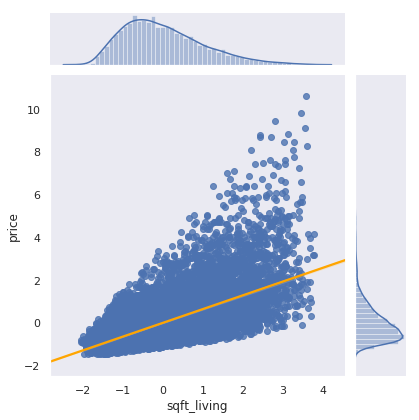

In [164]:
# Joint plots for selected non_mansion z_scores
for col in feature_cols:
    sns.jointplot(col, 'price', data=z_df, kind="reg", joint_kws={'line_kws':{'color':'orange'}})

### Initial Observations
The joint plots with the regression lines show possible relationships between the predictor variables and target variable that warrant further investigation. Positive correlations that are observable now (before any feature engineering) include the predictor variables of bedrooms, bathrooms, sqft_living, sqft_lot, floors (slight), sqft_basement, grade, sqft_above, lat (slight), sqft_living15, and sqft_lot15. 

## Modeling - an Iterative Process

* Use questions to guide models
* Generate meaningful visualizations
* Normalize values as needed
* Use models to examine relationships between variables
* Assess model fit and robustness

## Interpret

* Draw conclusions from the data that answer initial questions or that raise new questions
* Evaluate meaning of results from a technical perspective
* Evaluate meaning of results for non-technical stakeholders
* Present and communicate results based on audience 